## Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
# Prints files in current directory
print(os.listdir())

['.ipynb_checkpoints', 'DataCleaning.ipynb', 'insurance.csv']


In [3]:
# Loads insurance.csv into a DataFrame
df = pd.read_csv("insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Check for Missing Values

In [5]:
missingValue = df.isnull().sum()

In [6]:
missingValue

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Identify and Remove Duplicates

In [7]:
# Identify duplications 
dupInfo = df[df.duplicated(keep=False)] 

In [8]:
dupInfo

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
# Removes duplications
df = df.drop_duplicates()

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Descriptive Statistics

In [11]:
# Returns statistics about the numerical columns in a dataset ('age', 'bmi', 'children', 'charges')
descStats = df[['age', 'bmi', 'children', 'charges']].describe(include=[np.number])

In [12]:
descStats

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# Calculate mean, minimum, and maximum charges
chargesMean = df['charges'].mean()
chargesMin = df['charges'].min()
chargesMax = df['charges'].max()

In [14]:
chargesMean

13279.121486655948

In [15]:
chargesMin

1121.8739

In [16]:
chargesMax

63770.42801

## Data Visualization

<Axes: xlabel='age', ylabel='charges'>

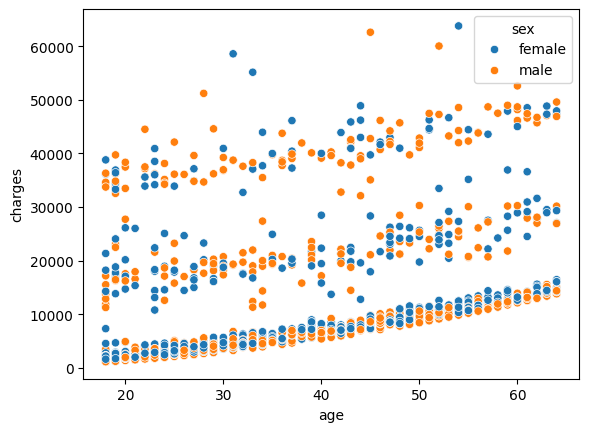

In [17]:
sns.scatterplot(x='age', y='charges', hue='sex',data=df)

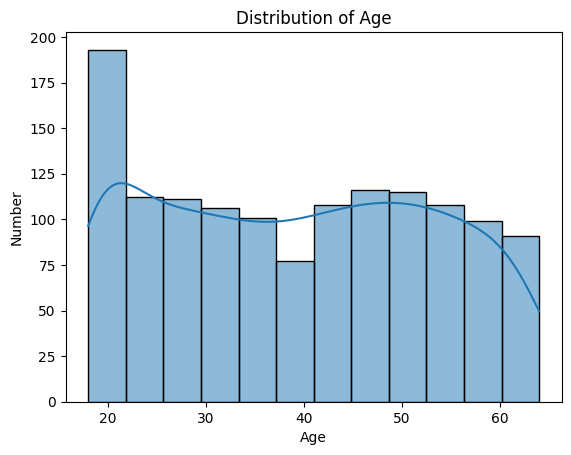

In [18]:
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

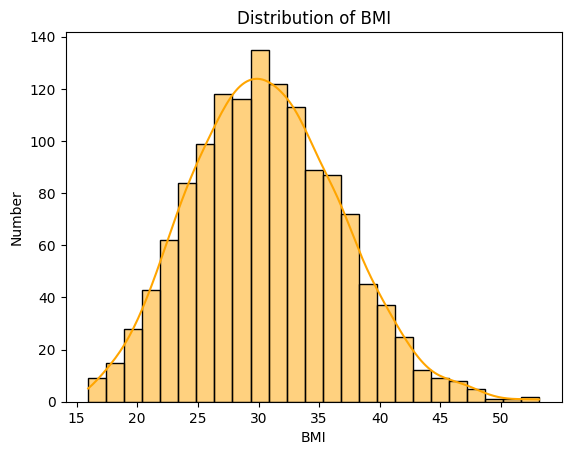

In [19]:
sns.histplot(df['bmi'], kde=True, color='orange')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Number')
plt.show()

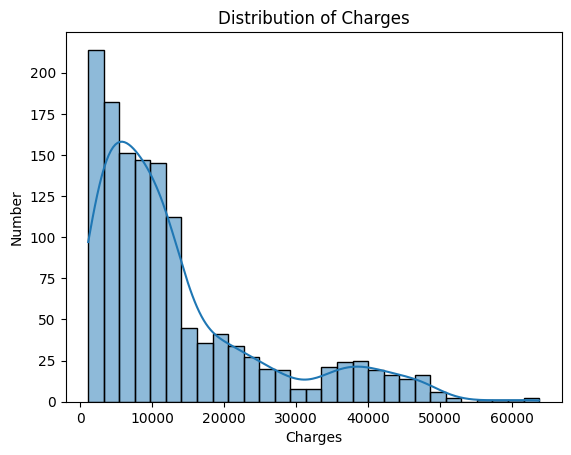

In [20]:
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Number')
plt.show()

## Convert to Numeric Values

In [21]:
# Defines categorical values to numeric values for region, smoker, sex
regionConvert = {'northwest': 0, 'northeast': 1, 'southwest': 2, 'southeast': 3}
smokerConvert = {'yes': 1, 'no': 0}
sexConvert = {'male': 1, 'female': 0}

In [22]:
# Converts categorical values to numeric values for region, smoker, sex
df.loc[:, 'region'] = df['region'].map(regionConvert)
df.loc[:, 'smoker'] = df['smoker'].map(smokerConvert)
df.loc[:, 'sex'] = df['sex'].map(sexConvert)

## Output Results to File

In [23]:
OutputFile = (
    "Duplicate Rows Removed:\n" + dupInfo.to_string(index=False) +
    "\n\nDescriptive Statistics Overview:\n" + descStats.to_string() + 
    "\n\nAdditional Statistics for Charges:\n" +
    f"Mean Charges: {chargesMean}\n" +
    f"Minimum Charges: {chargesMin}\n" +
    f"Maximum Charges: {chargesMax}\n"
)

In [24]:
# Write the results to a text file
with open('descStats.txt', 'w') as file:
    file.write(OutputFile)

In [25]:
print("Analysis results have been written to 'descStats.txt'.")

Analysis results have been written to 'descStats.txt'.


In [26]:
# Save the cleaned data to a new CSV file (cleanedInsurance.csv)
df.to_csv('cleanedInsurance.csv', index=False)
print("Cleaned data has been saved to 'cleanedInsurance.csv'.")

Cleaned data has been saved to 'cleanedInsurance.csv'.
